In [1]:
%load_ext autoreload
%autoreload 2
def loadDfs():
  dfs_to_load = [
    "~/OneDrive/Mouse2AFC_live/report/aggregates/all_Rbp4_M2.dump",
    #raw_df = pd.read_pickle("~/OneDrive/Mouse2AFC_live/report/aggregates/all_vgat.dump")
  ]
  import pandas as pd
  dfs = []
  for fp in dfs_to_load:
    dfs.append(pd.read_pickle(fp))
  return pd.concat(dfs)

def setup():
  import os
  from pathlib import Path
  #print(os.path.dirname(os.getcwd()))
  cur_dir = Path(os.getcwd())
  if cur_dir.name == "report":
    os.chdir(cur_dir.parent)
    print("Changing directories")
  from report import analysis
  analysis.setMatplotlibParams(silent=True)
setup()
raw_df = loadDfs()

Changing directories


Fonud: Rbp4_M2_1 - Num trials: 1,878
Insufficient trials (20) for 2021-02-01-Sess1
Bad performance (67.57%) for 2021-02-04-Sess1 - Len: 83
Insufficient trials (24) for 2021-02-04-Sess2
Bad performance (71.89%) for 2021-02-09-Sess3 - Len: 334
Reaction time len: 1198 - MinSamplingMax dist: 5.0    1209
Name: GUI_MinSampleMax, dtype: int64


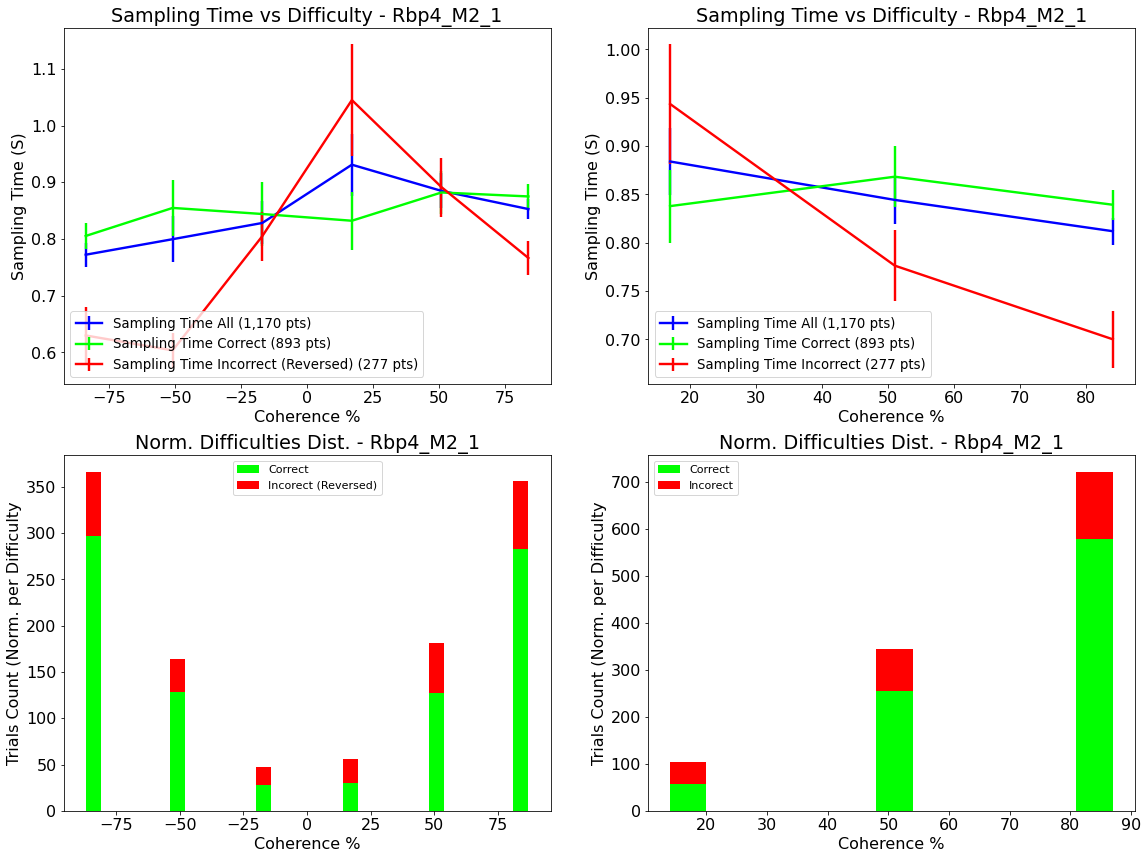

Fonud: Rbp4_M2_2 - Num trials: 2,674
Bad performance (67.86%) for 2021-01-26-Sess1 - Len: 266
Bad performance (65.79%) for 2021-01-27-Sess1 - Len: 68
Bad performance (59.46%) for 2021-02-05-Sess1 - Len: 78
Bad performance (61.54%) for 2021-02-05-Sess2 - Len: 194
Insufficient trials (35) for 2021-02-05-Sess3
Reaction time len: 1880 - MinSamplingMax dist: 5.0    1887
Name: GUI_MinSampleMax, dtype: int64


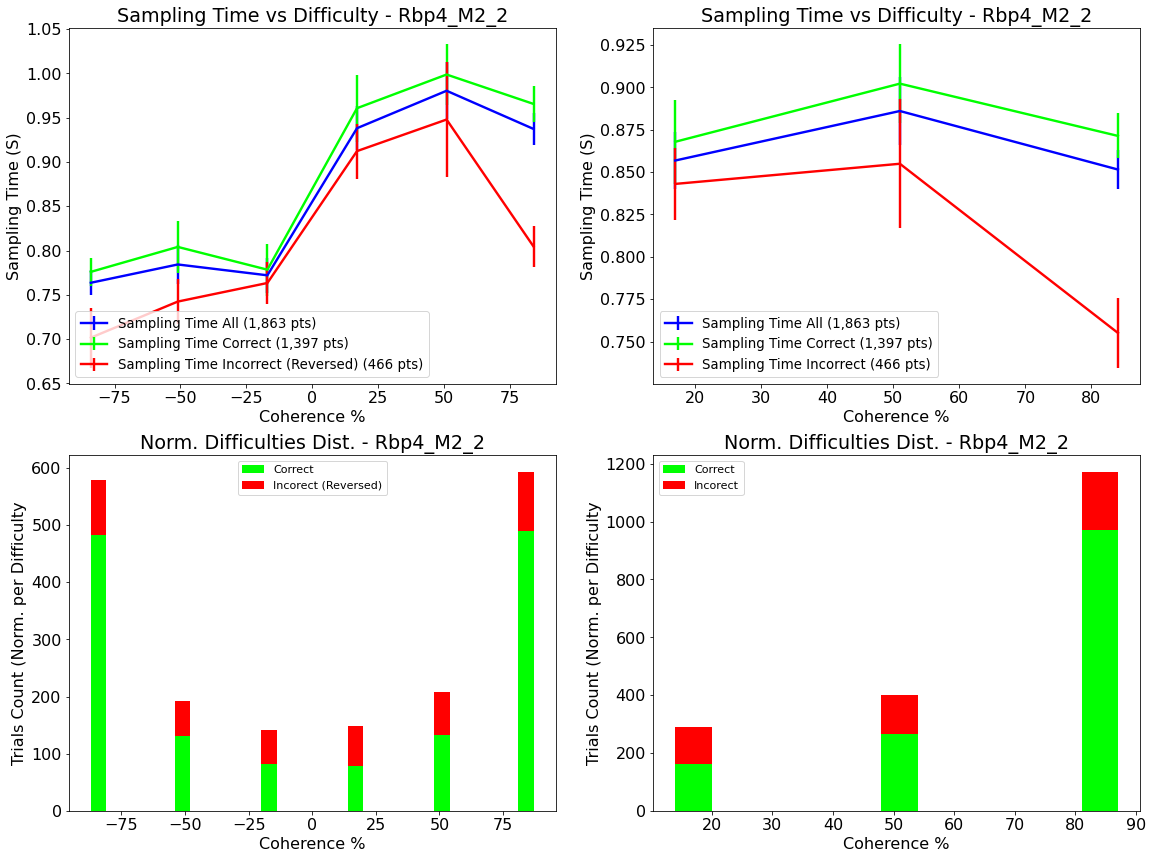

In [55]:
from report.evdaccum.reactiontime import reactionTime, Plots, AllPlots, NoPlots
from report.evdaccum.evdutils import Kargs, GroupBy
from report.definitions import ExpType

def run(df):
  short_long_quantile = 0.3
  vs_diff_kargs = Kargs(quantile_top_bottom=None, save_figs=False,
                        exp_type=ExpType.RDK, grpby=GroupBy.Difficulty,
                        plot_only_all=False,
                          #save_prefix="proto/x_VsDiff/")
                        save_prefix="proto/ReactionTimeShadlen/")
  import datetime as dt
  # raw_df[(raw_df.Date != dt.date(2021,1,8)) & (raw_df.calcReactionTime < 2)]
  # AllPlots & ~Plots.MinSampleDistHist
  # Plots.ReactionTimeVsDiff
  reactionTime(raw_df, overall_plots=Plots.ReactionTimeVsDiff | Plots.ReactionTimeVsDiffHist,
               sess_plots=NoPlots, min_easiest_perf=75, cut_below_trial_num=30,
               short_long_quantile=short_long_quantile, **vs_diff_kargs)
run(raw_df)

In [2]:
FILENAME=r"C:\Users\hatem\Downloads\ReactionTime_Mostafa.csv"
with open(FILENAME, 'r') as f:
  # FILENAME.rsplit("\\", 1)[-1]
  uploaded = {FILENAME: f.read()}
# print("Uploaded:", uploaded_dict)

In [3]:
import matplotlib.pyplot as plt
import datetime as dt
from report import analysis

def loadFiles(uploaded_dict):
  analysis.setMatplotlibParams(silent=True)
  filenames = list(uploaded_dict.keys())
  if len(filenames) != 1:
    display("Please upload only one file.")
    display("Please run this cell again and upload a single file.")
    return
  import pandas as pd
  res = pd.read_csv(filenames[0])
  res = res[res.TrialNumber.notnull()]
  res["ChoiceLeft"] = (res["key_press"] == 37).astype(float)
  res["ChoiceCorrect"] = res["correct"].astype(float)
  res["MaxTrial"] = res.TrialNumber.max()
  res["calcReactionTime"] = 0# "PLACEHOLDER"
  res["TrialStartTimestamp"] = res["time_elapsed"]/1000.0 # Convert to seconds
  res["LeftRewarded"] = (res["Direction"] == "Left").astype(int)
  res["ST"] = res["rt"]/1000#res["trial_duration"]
  res.loc[res["ST"] == -1, "ST"] = res[res["ST"] == -1].rt
  res["Name"] = "Reaction Time"
  res["Date"] = dt.date.today()
  res["TrialNumber"] = res["TrialNumber"].astype(int)
  res["SessionNum"] = 1
  res["ForcedLEDTrial"] = False
  dv_dir = res["LeftRewarded"].replace(0, -1)
  res["DV"] = res["coherence"] * dv_dir
  #print("Res:")
  #imp_cols = ["rt", "coherence", "time_elapsed", "correct", "trial_duration", "frame_rate", "TrialNumber", "Difficulty", "Direction", "ChoiceLeft"]
  imp_cols = ["TrialNumber", "DV", "ChoiceCorrect", "ChoiceLeft", "LeftRewarded",
              "Direction", "ST", "calcReactionTime", "TrialStartTimestamp",
              "frame_rate", "MaxTrial", "Difficulty", "Name",
               "ForcedLEDTrial", "Date", "SessionNum",]
  res = res[imp_cols].reset_index(drop=True)
  #new_cols = ["calcReactionTime", "coherence", "time_elapsed", "correct", "trial_duration", "frame_rate", "TrialNumber", "Difficulty", "Direction"]
  #display(res)
  return res

user_df = loadFiles(uploaded)

Fonud: Reaction Time - Num trials: 500
Reaction time len: 482 - MinSamplingMax dist: 0.1    500
Name: GUI_MinSampleMax, dtype: int64
Hist bins: 23


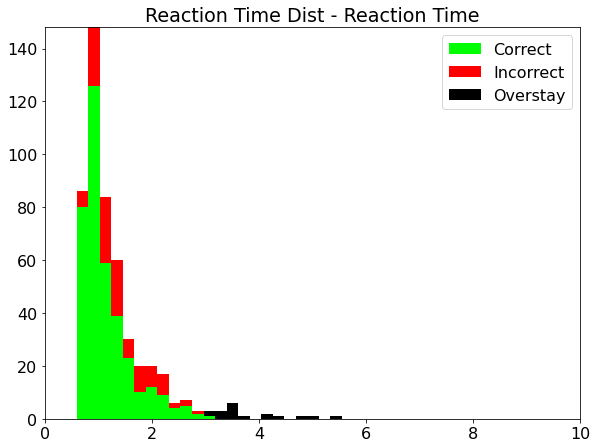

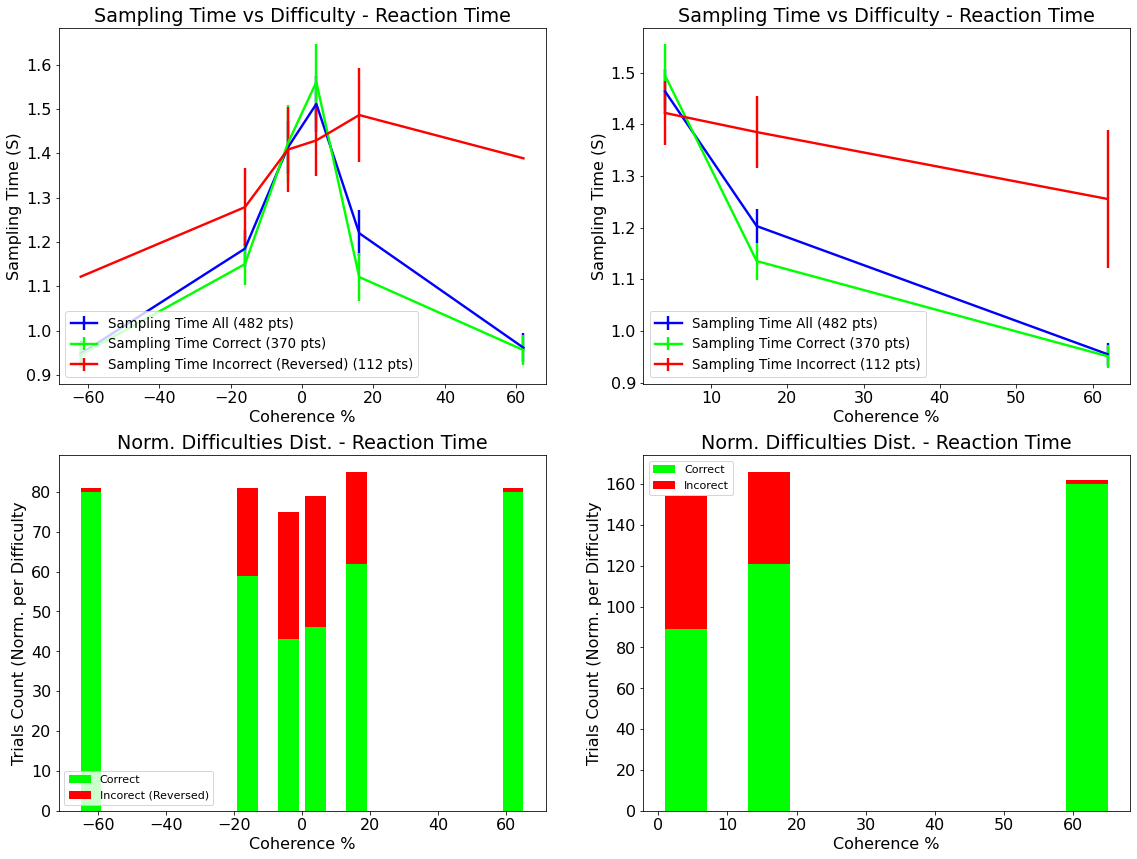

α: -0.05744798518896635 - β: 0.3458523120210628 - λ1: 0.0017237147227342313 - λ2: 6.462487791556794e-07


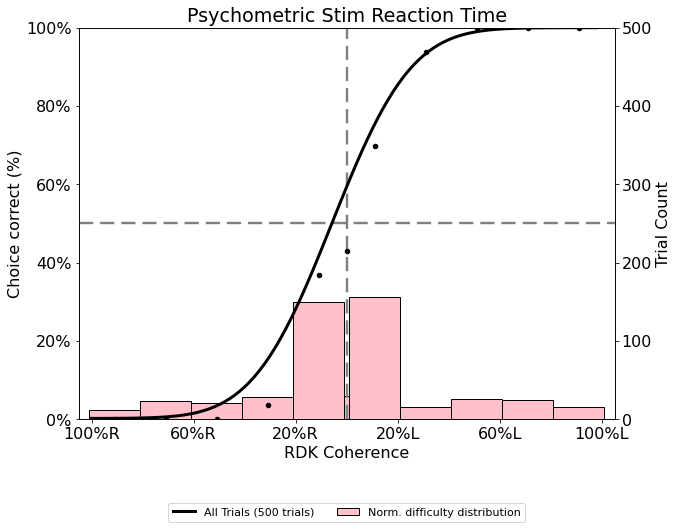

In [59]:
def rt(df):
  analysis.setMatplotlibParams(silent=True)
  df["GUI_StimAfterPokeOut"] = False
  df["GUI_MouseState"] = 2
  df["GUI_RewardAfterMinSampling"] = False
  df["CenterPortRewAmount"] = 0
  df["MinSample"] = 0.1
  df["GUI_MinSampleMax"] = 0.1
  df["GUI_StimulusTime"] = 3 # Seconds, otherwise overstay
  df["Difficulty1"] = df.DV.abs() * 100
  df["Difficulty3"] = 0
  from report.definitions import ExpType
  df["GUI_ExperimentType"] = ExpType.RDK
  #print(df.ST)
  # print(df.calcReactionTime)
  from report.evdaccum.reactiontime import reactionTime, Plots, NoPlots
  from report.evdaccum.evdutils import Kargs, GroupBy
  short_long_quantile = 0.3
  vs_diff_kargs = Kargs(quantile_top_bottom=None, save_figs=False,
                        exp_type=ExpType.RDK, grpby=GroupBy.EqualSize,
                        plot_only_all=False,
                        #save_prefix="proto/x_VsDiff/")
                        save_prefix="proto/ReactionTimeShadlen/")
  reactionTime(df, 
               overall_plots=Plots.ReactionTimeVsDiff | Plots.ReactionTimeVsDiffHist | Plots.ReactionTimeDistHist, 
               sess_plots=NoPlots, min_easiest_perf=75,
               cut_below_trial_num=0, short_long_quantile=short_long_quantile,
               **vs_diff_kargs)


def psych(df):
  analysis.setMatplotlibParams(silent=True)
  ax = analysis.psychAxes("Reaction Time")
  analysis.psychAnimalSessions(df, "Reaction Time", ax, analysis.METHOD)
  #analysis.savePlot("./Mostafa_reaction_time_psych")
  plt.show()

def trialRate(df):
  axes = plt.axes()
  analysis.trialRate(df, ax=axes, max_sess_time_lim_bug=24*60*60, # sec to hour
                     num_days_per_clr=10, IQR_filter=False)
  plt.show()

rt(user_df)
psych(user_df)